(Chap_LogIntro)=
# Logistic Regression Model

This chapter has an executable [Google Colab notebook](https://colab.research.google.com/drive/1kNMOMvoKzuzNq_rw1yz86B3N98hgTaZ8?usp=sharing) with all the same code, data references, and images. The Google Colab notebook allows you to execute the code in this chapter in the cloud so you don't have to download Python, any of its packages, or any data to your local computer. You could manipulate and execute this notebook on any device with a browser, whether than be your computer, phone, or tablet.

The focus of this chapter is to give the reader a basic introduction to the logistic regression model, where it comes from, and how it can be interpreted.


(Sec_LogQuantQual)=
## Quantitative versus Qualitative Data
The linear regression models of chapter {ref}`Chap_BasicEmpirMethods` have continuous quantitative variables as dependent variables. That is, the $y_i$ variable takes on a continuum of values. We use a different class of models to estimate the relationship of exogenous variables to *qualitative* or *categorical*  or *discrete* endogenous or dependent variables.

Examples of qualitative or categorical variables include:

* Binary variables take on two values ($J=2$), most often 0 or 1. Examples: Male or female, dead or alive, accept or reject.
* General categorical variables can take on more than two values ($J\geq 2$). Examples: red, blue, or green; teenager, young adult, middle aged, senior.

Note with general categorical variables that order and numerical distance do not matter. As an example let $FlowerColor_i=\{red=1, blue=2,green=3\}$ be a function of $neighborhood_i$, $season_i$, and $income_i$.

$$ FlowerColor_i = \beta_0 + \beta_1 neighborhood_i + \beta_2 season_i + \beta_3 income_i + u_i $$

We could mathematically estimate this regression model, but would that make sense? What would be wrong with a regression model?


(Sec_LogQuantQualClassSet)=
### The classification setting
Let $y_i$ be a qualitative dependent variable on $N$ observations with $i$ being the index of the observation. Each observation $y_i$ can take on one of $J$ discrete values $j\in\{1,2,...J\}$. Let $x_{p,i}$ be the $i$th observation of the $p$th explanatory variable (independent variable) such that $X_i=\{x_{1,i}, x_{2,i}, ... x_{P,i}\}$. Then the general formulation of a classifier comes in the following two forms,

```{math}
    :label: EqLog_GenClassModel
    Pr(y_i=j|X_i,\theta) = f(X_i|\theta) \quad\forall i, j \quad\text{or}\quad \sum_{j=1}^J I_j(y_i=j) = f(X_i|\theta) \quad\forall i, j
```

where $I_j$ in the second formulation is an indicator function that equals 1 when $y_i=j$ and equals 0 otherwise.


(Sec_LogRegClass)=
## Logistic Regression Classifier
In this section, we will look at two models for binary (0 or 1) categorical dependent variables. We describe the first model--the linear probability (LP) model--for purely illustrative purposes. This is because the LP model has some serious shortcomings that make it almost strictly dominated by our second model in this section.

The second model--the logistic regression (logit, binary classifier) model--will be the focus of this section. There is another variant of this model, the probit model. But the logistic model is the more flexible, more easily interpretable, and more commonly used of the two.


(Sec_LogLPM)=
### The linear probability (LP) model

One option in which a regression is barely acceptable for modeling a binary (categorical) dependent variable is the linear probability (LP) model. When the dependent variable has only two categories, it can be modeled as $y_i\in\{0,1\}$ without loss of generality. Let the variable $z_i$ be interpreted as the probability that $y_i=1$ given the data $X_i$ and parameter values $\theta=\{\beta_0,\beta_1,...\beta_P\}$.

```{math}
    :label: EqLog_LPM
    z_i = Pr(y_i=1|X_i,\theta) = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... \beta_P x_{P,i} + u_i
```

The LP model can be a nice, easy, computationally convenient way to estimate the probability of outcome $y_i=1$. This could also be reinterpreted, without loss of generality, as the probability that $y_i=0$. This is equivalent to a redefinition of which outcome is defined as $y_i=1$.

The main drawback of the LP model is that the predicted values of the probability that $y_i=1$ or $Pr(y_i=1|X_i,\theta)$ can be greater than 1 and can be less than 0. It is for this reason that it is very difficult to publish any research based on an LP model.


(Sec_LogLogit)=
### The logistic (logit) regression classifier

In contrast to the linear probability model, a good classifier tranforms numerical values from explanatory variables or feature variables into a probability that is strictly between 0 and 1. More specifically this function must take any numer on the real line between $-\infty$ and $\infty$ and map it to the $[0,1]$ interval. In addition, we want a monotonically increasing relationship between $x$ and the function $f(x)$. What are some functions with this property? Candidates include the following functions.

* $f(x)=\text{max}\Bigl(0, \,\text{min}\bigl(1, x\bigr)\Bigr)$
* $f(x)=\frac{e^x}{1 + e^x}$
* $f(x) = \arctan(x)$
* $f(x) = \text{cdf}(x)$

Why don't functions like $\sin(x)$, $\cos(x)$, and $\frac{|x|}{1+|x|}$ fit these criteria?

The second function in the bulletted list above is the logistic function. The logistic regression model is a binary dependent variable classifier that constrains its predicted values to be stricly between 0 and 1. The logistic function is the following,

```{math}
    :label: EqLog_Logistic
    f(x) = \frac{e^x}{1 + e^x} \quad\forall x
```

and has the following general shape.

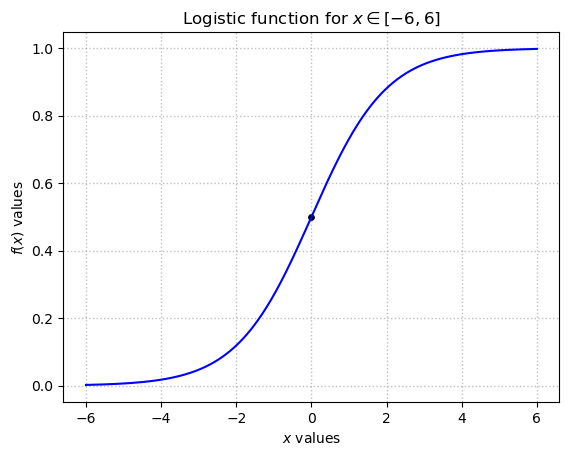

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-6, 6, 500)
y_vals = np.exp(x_vals) / (1 + np.exp(x_vals))
plt.plot(x_vals, y_vals, color="blue")
plt.scatter(0, 0.5, color="black", s=15)
plt.title(r"Logistic function for $x\in[-6,6]$")
plt.xlabel(r'$x$ values')
plt.ylabel(r'$f(x)$ values')
plt.grid(color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.show()

```{figure} ../../../images/basic_empirics/logit/logit_gen.png
:height: 500px
:name: FigLogit_logit_gen

Logistic function for $x\in[-6,6]$
```

The logistic regression function is the specific case of the logistic function where the value of $x$ in the general logistic function {eq}`EqLog_Logistic` is replaced by a linear combination of variables $\beta_0 + \beta_1 x_{1,i} + ...\beta_P x_{P,i}$ similar to a linear regression model.

```{math}
    :label: EqLog_Logit_std
    Pr(y_i=1|X_i,\theta) = \frac{e^{X_i\beta}}{1 + e^{X_i\beta}} = \frac{e^{\beta_0 + \beta_1 x_{1,i} + ...\beta_P x_{P,i}}}{1 + e^{\beta_0 + \beta_1 x_{1,i} + ...\beta_P x_{P,i}}}
```

or equivalently

```{math}
    :label: EqLog_Logit_neg
    Pr(y_i=1|X_i,\theta) = \frac{1}{1 + e^{-X_i\beta}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{1,i} + ...\beta_P x_{P,i})}}
```

We could estimate the paramters $\theta=\{\beta_0,\beta_1,...\beta_P\}$ by generalized method of moments (GMM) using nonlinear least squares or a more general set of moments to match.[^GMM] But maximum likelihood estimation is the most common method for estimating the parameters $\theta$ because of its more robust statistical properties.[^MaxLikeli] Also, the distributional assumptions are built into the model, so they are not overly strong.


(Sec_LogLogitNLLS)=
#### Nonlinear least squares estimation
If we define $z_i = Pr(y_i=1|X_i,\theta)$, then the error in the logistic regression is the following.

```{math}
    :label: EqLog_LogitNLLS_err
    \varepsilon_i = y_i - z_i
```

The GMM specification of the nonlinear least squares method of estimating the parameter vector $\theta$ would then be the following.[^GMM]

```{math}
    :label: EqLog_LogitNLLS_gmm
    \begin{split}
      \hat{\theta}_{nlls} = \theta:\quad &\min_{\theta} \sum_{i=1}^N\varepsilon_i^2 \quad = \quad \min_{\theta}\sum_{i=1}^N\bigl(y_i - z_i \bigr)^2 \quad \\
      &= \quad \min_{\theta} \sum_{i=1}^N\Bigl[y_i - Pr(y_i=1|X_i,\theta)\Bigr]^2
    \end{split}
```


(Sec_LogLogitMLE)=
#### Maximum likelihood estimation
We characterized the general likelihood function for a sample of data as the probability that the given sample $(y_i,X_i)$ came from the assumed distribution given parameter values $Pr(y_i=1|X_i,\theta)$.

```{math}
    :label: EqLog_LogitMLE_like
    \mathcal{L}(y_i,X_i|\theta) = \prod_{i=1}^N Pr(y_i=1|X_i,\theta)^{y_i}\bigl[1 - Pr(y_i=1|X_i,\theta)\bigr]^{1 - y_i}
```

The intuition of this likelihood function is that you want the probability of the observations for which $y_i=1$ to be close to one $Pr(X)$, and you want the probability of the observations for which $y_i=0$ to also be close to one $1 - Pr(X)$.

The log-likelihood function, which the MLE problem maximizes is the following.

```{math}
    :label: EqLog_LogitMLE_loglike
    \ln\bigl[\mathcal{L}(y_i,X_i|\theta)\bigr] = \sum_{i=1}^N\Bigl(y_i\ln\bigl[Pr(y_i=1|X_i,\theta)\bigr] + (1 - y_i)\ln\bigl[1 - Pr(y_i=1|X_i,\theta)\bigr]\Bigr)
```

The MLE problem for estimating $\theta$ of the logistic regression model is, therefore, the following.[^MaxLikeli]

```{math}
    :label: EqLog_LogitMLE_maxprob
    \hat{\theta}_{mle} = \theta:\quad \max_{\theta} \ln\bigl[\mathcal{L}(y_i,X_i|\theta)\bigr]
```

(Sec_LogLogitTitanic)=
#### Titanic example
A good example of logistic regression comes from a number of sources. But I am adapting some code and commentary from [http://www.data-mania.com/blog/logistic-regression-example-in-python/](http://www.data-mania.com/blog/logistic-regression-example-in-python/). The research question is to use a famous Titanic passenger dataset to try to identify the characteristics that most predict whether you survived $y_i=1$ or died $y_i=0$.

In [2]:
import pandas as pd

url = ('https://raw.githubusercontent.com/OpenSourceEcon/CompMethods/' +
      'main/data/basic_empirics/logit/titanic-train.csv')
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
                   'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The variable descriptions are the following:
* `Survived`: Survival (0 = No; 1 = Yes)
* `Pclass`: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
* `Name`: Name
* `Sex`: Gender
* `Age`: Age
* `SibSp`: Number of siblings/spouses aboard
* `Parch`: Number of parents/children aboard
* `Ticket`: Ticket number
* `Fare`: Passenger fare (British pound)
* `Cabin`: Cabin
* `Embarked`: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Let's first check that our target variable, `Survived`, is binary. Since we are building a model to predict survival of passangers from the Titanic, our target is going to be the `Survived` variable from the titanic dataframe. To make sure that it is a binary variable, let's use Panda's `.value_counts()` method and plot the counts in a `matplotlib.pyplot` bar chart.

In [3]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

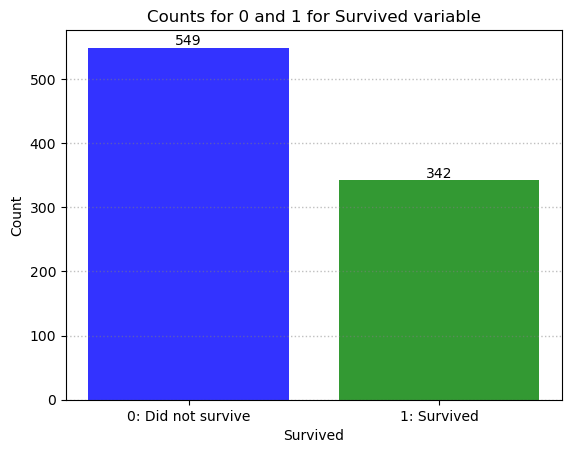

In [4]:
categories = titanic["Survived"].value_counts().index
counts = titanic["Survived"].value_counts().values
fig, ax = plt.subplots()
vbars = plt.bar(
    ["0: Did not survive", "1: Survived"], counts, color=["blue", "green"],
    alpha=0.8
)
ax.yaxis.grid(color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.bar_label(vbars, label_type="edge")
plt.title(r"Counts for 0 and 1 for Survived variable")
plt.xlabel(r'Survived')
plt.ylabel(r'Count')
plt.show()

```{figure} ../../../images/basic_empirics/logit/survived_count.png
:height: 500px
:name: FigLogit_survived_count

Counts for 0 and 1 for Survived variable
```

We can check for missing values in the DataFrame. It is easy to check for missing values by calling the `isnull()` method, and the `sum()` method off of the DataFrame to return a tally of all the `True` values that are returned by the `isnull()` method.

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How many observations are there in the DataFrame?

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Model selection and missing values**

The variable `Cabin` is missing data in the majority of its observations, so we should not include that in our analysis (although that would be an interesting variable to have). We can also probably exclude `Name`, `Ticket` (ticket number). But we will include all the other variables.

* `Survived`: This variable is obviously relevant.
* `Pclass`: Does a passenger's class on the boat affect their survivability?
* `Sex`: Could a passenger's gender impact their survival rate?
* `Age`: Does a person's age impact their survival rate?
* `SibSp`: Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probably.
* `Parch`: Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probably.
* `Fare`: Does the fare a person paid effect his survivability? Maybe.
* `Embarked`: Does a person's point of embarkation matter? It depends on how the boat was filled.

In [7]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now we have the dataframe reduced down to only relevant variables, but now we need to deal with the missing values in the age variable.

**Imputing missing values**

Let's look at how passenger age is related to their class as a passenger on the boat.

In [8]:
titanic_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

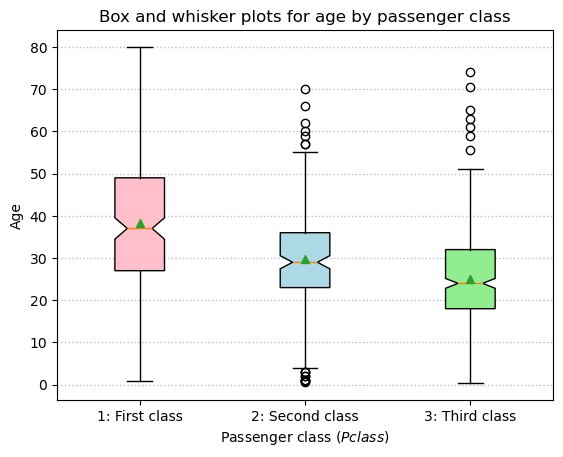

In [9]:
# Create a list of three NumPy arrays of Age data by Pclass
age_by_pclass_dtalst = []
for pclass_val in range(1, 4):
    age_by_pclass_vec = titanic_data["Age"][
        titanic_data["Pclass"]==pclass_val
    ].values
    # Have to remove nan values for the boxplot to work
    age_by_pclass_vec_nonan = age_by_pclass_vec[
        ~np.isnan(age_by_pclass_vec)
    ]
    age_by_pclass_dtalst.append(age_by_pclass_vec_nonan)

labels = ["1: First class", "2: Second class", "3: Third class"]

fig, ax = plt.subplots()
boxplot1 = plt.boxplot(
    age_by_pclass_dtalst,
    notch=True,  # Notch shape
    vert=True,  # Vertical box alignment
    patch_artist=True,  # Fill boxes with color
    showmeans=True,  # Show the mean value as a scatter point in each box
    labels=labels
)
ax.yaxis.grid(color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.title(r"Box and whisker plots for age by passenger class")
plt.xlabel(r'Passenger class ($Pclass$)')
plt.ylabel(r'Age')

# fill boxes with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

```{figure} ../../../images/basic_empirics/logit/age_boxplot.png
:height: 500px
:name: FigLogit_age_boxplot

Box and whisker plots for age by passenger class
```

The box and whisker plots in {numref}`Figure %s <FigLogit_age_boxplot>` are a nice way to visualize where the data live. The two ends of the colored box show the first quartile (25th percentil) to the third quartile (75th percentile), with the notched line representing the median (50th percentile). A scatter point great triangle shows the mean. The whiskers extend to 1.5x the inter-quartile range (IQR) of ages, with outliers beyond the whiskers shown as scatter points. An alternative would be to show a histogram.

Roughly speaking, we could say that the younger a passenger is, the more likely they are to be in 3rd class. The older a passenger is, the more likely they are to be in 1st class. So there is a loose relationship between these variables. So let's write a function that approximates a passengers age, based on their class. From the box plot, it looks like the average age of 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

So let's write a function that finds each null value in the `Age` variable, and for each null, checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.

In [10]:
median_ages = titanic_data.groupby("Pclass")["Age"].median().values

# Create new variable Age_imputed and impute the median ages for missing values
titanic_data["Age_imputed"] = titanic_data["Age"]
for pclass_val in range(1, 4):
    row_indexer = (
        titanic_data["Age"].isnull() * titanic_data["Pclass"] == pclass_val
    )
    titanic_data.loc[row_indexer, "Age_imputed"] = median_ages[pclass_val - 1]
    imputed_obs = row_indexer.sum()
    print("Imputed", imputed_obs, "Age values with Pclass=", pclass_val)

titanic_data.isnull().sum()

Imputed 30 Age values with Pclass= 1
Imputed 11 Age values with Pclass= 2
Imputed 136 Age values with Pclass= 3


Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Age_imputed      0
dtype: int64

There are 2 null values in the `Embarked` variable. We can drop those 2 records without loosing too much important information from our dataset, so we will do that.

In [11]:
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_imputed    0
dtype: int64

In [12]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_imputed
0,0,3,male,22.0,1,0,7.2500,S,22.0
1,1,1,female,38.0,1,0,71.2833,C,38.0
2,1,3,female,26.0,0,0,7.9250,S,26.0
3,1,1,female,35.0,1,0,53.1000,S,35.0
4,0,3,male,35.0,0,0,8.0500,S,35.0


**Converting categorical variables to a dummy indicators**

The next thing we need to do is reformat our variables so that they work with the model. Specifically, we need to reformat the `Sex` and `Embarked` variables into numeric categorical variables.


(Sec_LogLogitInterpret)=
#### Interpreting coefficients (log odds ratio)

The odds ratio in the logistic model is provides a nice way to interpret logit model coefficients. Let $z\equiv X^T\beta = \beta_0 + \beta_1 x_{1,i} + ...\beta_K x_{K,i}$. The logistic model is stated by the probability that the binary categorical dependent variable equals one $y_i=1$.
\begin{equation}
  P(y_i=1|X,\theta) = \frac{e^z}{1 + e^z}
\end{equation}
Given this equation, we know that the probability of the dependent variable being zero $y_i=0$ is just one minus the probability above.
\begin{equation}
  P(y_i=0|X,\theta) = 1 - P(y_i=1|X,\theta) = 1 - \frac{e^z}{1 + e^z} = \frac{1}{1 + e^z}
\end{equation}

The odds ratio is a common way of expressing the probability of an event versus all other events. For example, if the probability of your favorite team winning a game is $P(win)=0.8$, then we know that the probability of your favorite team losing that game is $P(lose)=1-P(win)=0.2$. The odds ratio is the ratio of these two probabilities.
\begin{equation}
  \frac{P(win)}{P(lose)} = \frac{P(win)}{1 - P(win)} = \frac{0.8}{0.2} = \frac{4}{1} \quad\text{or}\quad 4
\end{equation}
The odds ratio tells you that the probability of your team winning is four times as likely as your team losing. A gambler would say that your odds are 4-to-1. Another way of saying it is that your team will win four out of five times and will lose 1 out of five times.

In the logistic model, the odds ratio reduces the problem nicely.
\begin{equation}
  \frac{P(y_i=1|X,\theta)}{1 - P(y_i=1|X,\theta)} = \frac{\frac{e^z}{1 + e^z}}{\frac{1}{1 + e^z}} = e^z
\end{equation}
If we take the log of both sides, we see that the log odds ratio is equal to the linear predictor $z\equiv X^T\beta = \beta_0 + \beta_1 x_{1,i} + ...\beta_K x_{K,i}$.
\begin{equation}
  \ln\left(\frac{P(y_i=1|X,\theta)}{1 - P(y_i=1|X,\theta)}\right) = z = \beta_0 + \beta_1 x_{1,i} + ...\beta_K x_{K,i}
\end{equation}

So the interpretation of the coeficients $\beta_k$ is that a one-unit increase of the variable $x_{k,i}$ increases the odds ratio or the odds of $y_i=1$ by $\beta_{k,i}$ percent.


(Sec_LogMultiNomLogit)=
## Multinomial Logit
The multinomial logit model is a natural extension of the logit model. In contrast to the logit model in which the dependent variable has only two categories, the multinomial logit model accomodates $J\geq2$ categories in the dependent variable. Let $\eta_j$ be the linear predictor for the $j$th category.
$$ \eta_j\equiv \beta_{j,0} + \beta_{j,1}x_{1,i} + ...\beta_{j,K}x_{K,i} \quad\forall y_i = j $$

The multinomial logit model gives the probability of $y_i=j$ relative to some reference category $J$ that is left out.
\begin{equation}
  Pr(y_i=j|X,\theta) = \frac{e^{\eta_j}}{1 + \sum_v^{J-1}e^{\eta_v}} \quad\text{for}\quad 1\leq j\leq J-1
\end{equation}

Once the $J-1$ sets of coefficients are estimated, the final $J$th set of coefficients are a residual based on the following expression.
\begin{equation}
  Pr(y_i=J|X,\theta) = \frac{1}{1 + \sum_v^{J-1}e^{\eta_v}}
\end{equation}

The analogous log odds ratio interpretation applies to the multinomial logit model.
\begin{equation}
  \ln\left(\frac{Pr(y_i=j|X,\theta)}{Pr(y_i=J|X,\theta)}\right) = \eta_j = \beta_{j,0} + \beta_{j,1}x_{1,i} + ...\beta_{j,K}x_{K,i} \quad\text{for}\quad 1\leq j \leq J-1
\end{equation}
This is the odds ratio of $y_i=j$ relative to $y_i=J$. The interpretation of the $\beta_{j,k}$ coefficient is the predicted percentage change in the log odds ratio of $y_i=j$ to $y_i=J$ from a one-unit increase in variable $x_{k,i}$.

TODO: list code for Iris example


(Sec_LogExercises)=
## Exercises

Put exercises here.


(SecLogFootnotes)=
## Footnotes

The footnotes from this chapter.

[^GMM]: See the {ref}`Chap_GMM` chapter of this book.

[^MaxLikeli]: See the {ref}`Chap_MLE` chapter of this book.